###                  ADTA- 5560 - Recurrent Neural Networks for Sequence Data


### Group Name: Neuro Architects

### Forecasting Crime Incidents in Los Angeles Using RNN Models


In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


crime_data = pd.read_csv('Crime_Data_from_2020_to_Present 2.csv')

In [285]:
crime_data['DATE OCC'] = pd.to_datetime(
    crime_data['DATE OCC'],
    format='%m/%d/%Y %I:%M:%S %p'
)

crime_data.set_index('DATE OCC', inplace=True)
crime_data.sort_index(inplace=True)

In [286]:
crime_data.shape

(1003448, 27)

In [287]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003448 entries, 2020-01-01 to 2024-12-21
Data columns (total 27 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1003448 non-null  int64  
 1   Date Rptd       1003448 non-null  object 
 2   TIME OCC        1003448 non-null  int64  
 3   AREA            1003448 non-null  int64  
 4   AREA NAME       1003448 non-null  object 
 5   Rpt Dist No     1003448 non-null  int64  
 6   Part 1-2        1003448 non-null  int64  
 7   Crm Cd          1003448 non-null  int64  
 8   Crm Cd Desc     1003448 non-null  object 
 9   Mocodes         851881 non-null   object 
 10  Vict Age        1003448 non-null  int64  
 11  Vict Sex        858856 non-null   object 
 12  Vict Descent    858844 non-null   object 
 13  Premis Cd       1003432 non-null  float64
 14  Premis Desc     1002860 non-null  object 
 15  Weapon Used Cd  327140 non-null   float64
 16  Weapon Desc     32714

In [288]:
crime_data.head()

,DR_NO,Date Rptd,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
DATE OCC,,,,,,,,,,,,,,,,,,,,,
2020-01-01,201304041,01/01/2020 12:00:00 AM,1520,13,Newton,1385,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0603 0421 0913,...,AO,Adult Other,930.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9857,-118.2628
2020-01-01,201904016,01/01/2020 12:00:00 AM,300,19,Mission,1982,2,624,BATTERY - SIMPLE ASSAULT,0400,...,IC,Invest Cont,624.0,NaN,NaN,NaN,15200 ACRE ST,NaN,34.2300,-118.4644
2020-01-01,202107086,03/08/2020 12:00:00 AM,1,21,Topanga,2177,2,354,THEFT OF IDENTITY,1822 0929,...,IC,Invest Cont,354.0,NaN,NaN,NaN,5600 RAWLINGS AV,NaN,34.1726,-118.5728
2020-01-01,201904455,01/10/2020 12:00:00 AM,2030,19,Mission,1905,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,13900 FOOTHILL BL,NaN,34.3155,-118.4343
2020-01-01,201225633,10/21/2020 12:00:00 AM,1,12,77th Street,1204,1,815,SEXUAL PENETRATION W/FOREIGN OBJECT,0913 1257 1817,...,AO,Adult Other,812.0,815.0,NaN,NaN,1400 W VERNON AV,NaN,34.0037,-118.3007


In [289]:
num_cols = crime_data.select_dtypes(include="number").columns

display(crime_data[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
DR_NO,1003448.0,2.201855e+08,1.316963e+07,817.0000,2.106163e+08,2.209148e+08,2.311086e+08,2.499289e+08
TIME OCC,1003448.0,1.339862e+03,6.511008e+02,1.0000,9.000000e+02,1.420000e+03,1.900000e+03,2.359000e+03
AREA,1003448.0,1.069201e+01,6.110398e+00,1.0000,5.000000e+00,1.100000e+01,1.600000e+01,2.100000e+01
Rpt Dist No,1003448.0,1.115659e+03,6.111720e+02,101.0000,5.870000e+02,1.139000e+03,1.613250e+03,2.199000e+03
Part 1-2,1003448.0,1.400526e+00,4.900053e-01,1.0000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Crm Cd,1003448.0,5.002210e+02,2.053109e+02,110.0000,3.310000e+02,4.420000e+02,6.260000e+02,9.560000e+02
Vict Age,1003448.0,2.891332e+01,2.199538e+01,-4.0000,0.000000e+00,3.000000e+01,4.400000e+01,1.200000e+02
Premis Cd,1003432.0,3.055846e+02,2.193049e+02,101.0000,1.010000e+02,2.030000e+02,5.010000e+02,9.760000e+02
Weapon Used Cd,327140.0,3.639267e+02,1.237413e+02,101.0000,3.110000e+02,4.000000e+02,4.000000e+02,5.160000e+02
Crm Cd 1,1003437.0,4.999812e+02,2.051113e+02,110.0000,3.310000e+02,4.420000e+02,6.260000e+02,9.560000e+02


### Data Preparation

**Dropping the unneccessary columns**

In [290]:
to_drop = ["DR_NO", "Date Rptd", "Mocodes", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"]
crime_data = crime_data.drop(columns=to_drop, errors="ignore")


**Renaming the Column name as per the analysis**

In [291]:
crime_data.rename(
    columns={'Crm Cd Desc': 'Crime_type'},
    inplace=True
)


**Inspecting the time-series target variable**

In [292]:
print("Dataset span:", crime_data.index.min(), "to", crime_data.index.max())
print("\nDaily crime counts:")
daily = crime_data.resample('D').size()
print(daily.describe())

Dataset span: 2020-01-01 00:00:00 to 2024-12-21 00:00:00

Daily crime counts:
count    1817.000000
mean      552.255366
std       142.969413
min         3.000000
25%       514.000000
50%       576.000000
75%       625.000000
max      1163.000000
dtype: float64


**Checking the missing values**

In [293]:
missing_counts = crime_data.isnull().sum()
missing_counts

,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crime_type,0
Vict Age,0
Vict Sex,144592
Vict Descent,144604


**Handling missing values**

In [294]:
missing_pct = crime_data.isnull().mean() * 100

cols_to_drop = missing_pct[missing_pct > 50].index.tolist()
crime_data.drop(columns=cols_to_drop, inplace=True)

num_cols = crime_data.select_dtypes(include='number').columns
medians = crime_data[num_cols].median()
crime_data[num_cols] = crime_data[num_cols].fillna(medians)

cat_cols = crime_data.select_dtypes(include='object').columns
crime_data[cat_cols] = crime_data[cat_cols].fillna("Unknown")

missing_after = crime_data.isnull().sum()
print("\n Missing values After filling:")
print(missing_after)


 Missing values After filling:
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crime_type      0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
LAT             0
LON             0
dtype: int64


**Checking outliers**

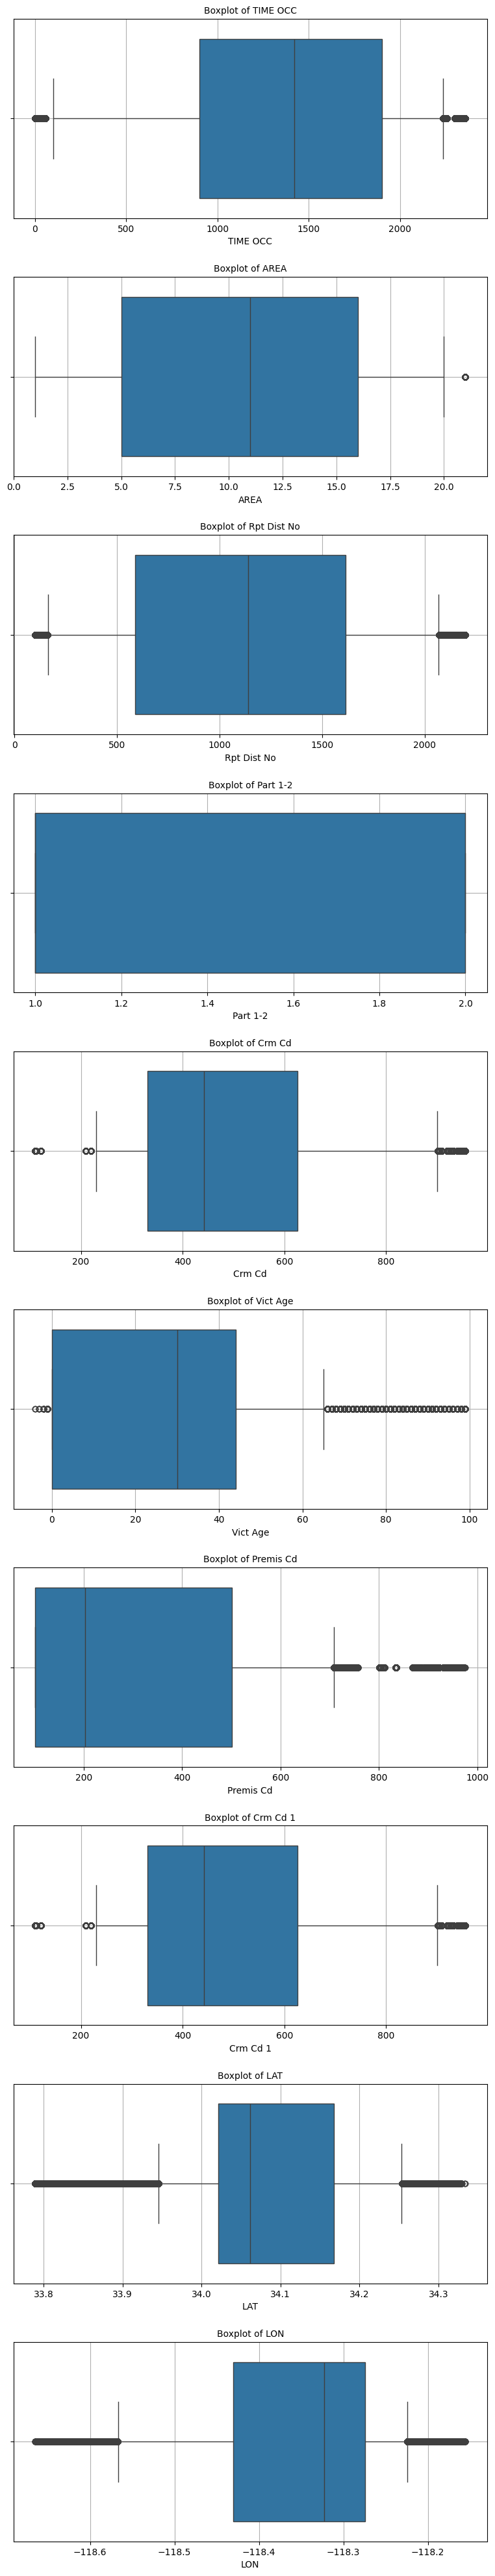

In [295]:
import seaborn as sns
# 1. Identify numeric columns
num_cols = crime_data.select_dtypes(include=["number"]).columns

fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 4 * len(num_cols)), dpi=100)

for i, col in enumerate(num_cols):
    q1 = crime_data[col].quantile(0.25)
    q3 = crime_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_data = crime_data[(crime_data[col] >= lower_bound) & (crime_data[col] <= upper_bound)][col]

    sns.boxplot(x=filtered_data, ax=axes[i], whis=[5, 95])
    axes[i].set_title(f"Boxplot of {col}", fontsize=10)

    axes[i].grid(True)

plt.tight_layout(pad=2)
plt.show()

**Outlier Handling using IQR method**

In [296]:
num_cols = crime_data.select_dtypes(include=[np.number]).columns.tolist()

def remove_outliers_iqr(crime_data, column):
    q1 = crime_data[column].quantile(0.25)
    q3 = crime_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return crime_data[(crime_data[column] >= lower_bound) & (crime_data[column] <= upper_bound)]

for col in num_cols:
    crime_data = remove_outliers_iqr(crime_data, col)
print("Dataset size after handling outliers:\n",crime_data.shape)

Dataset size after handling outliers:
 (972554, 18)


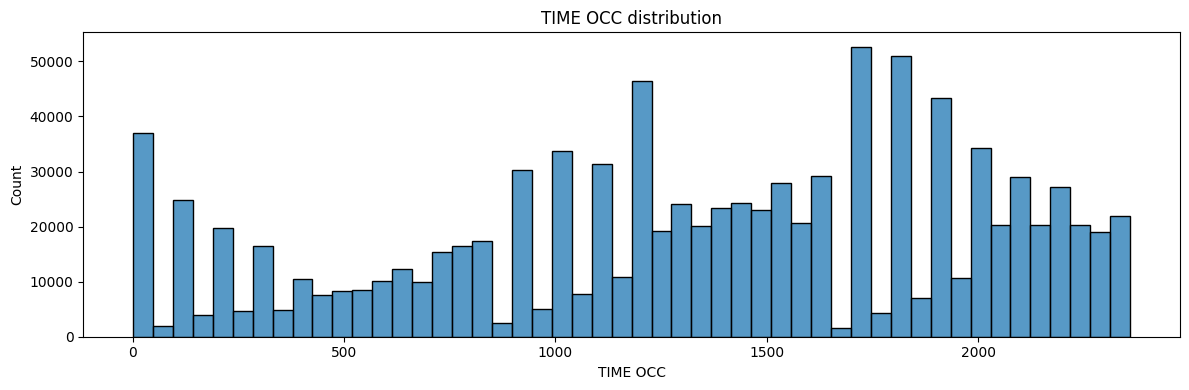

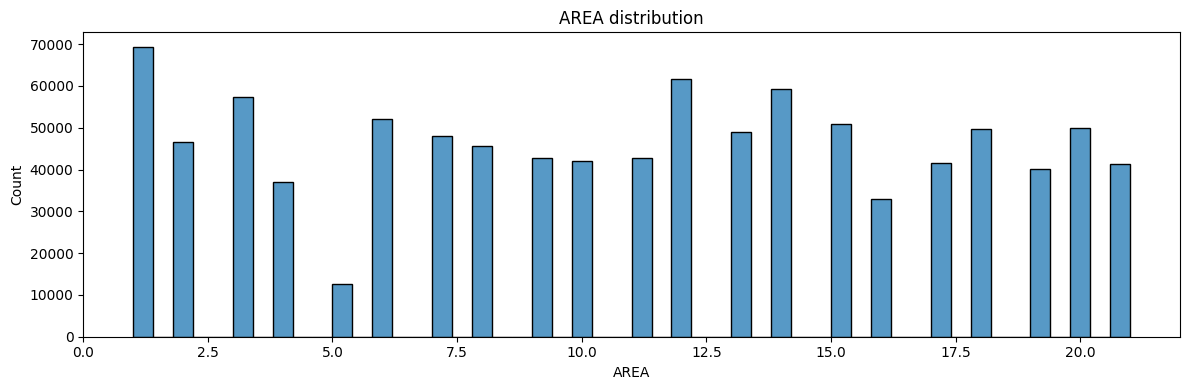

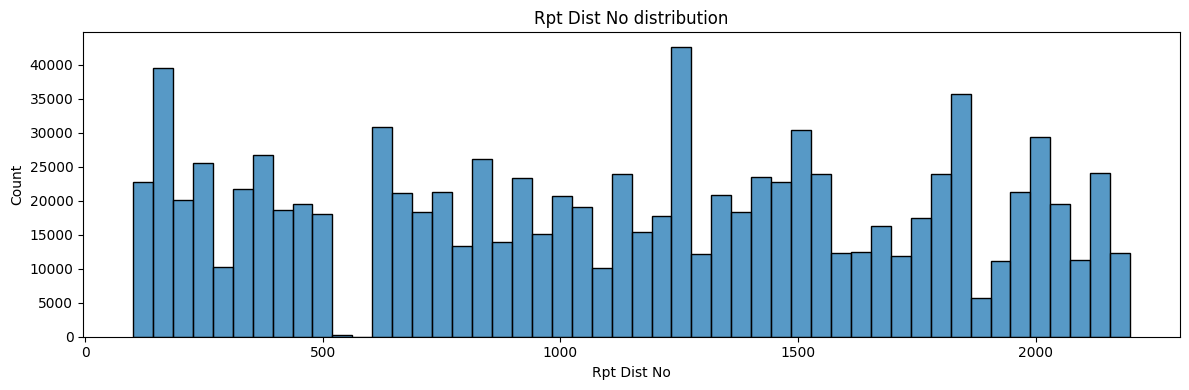

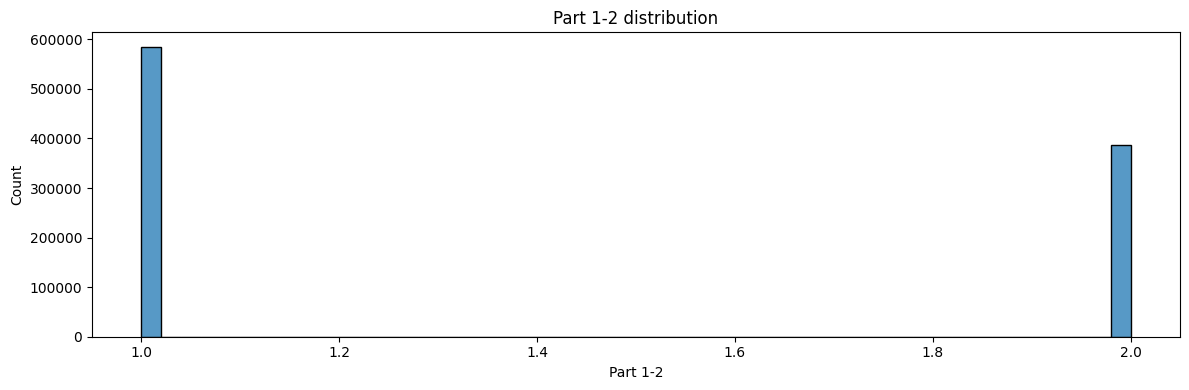

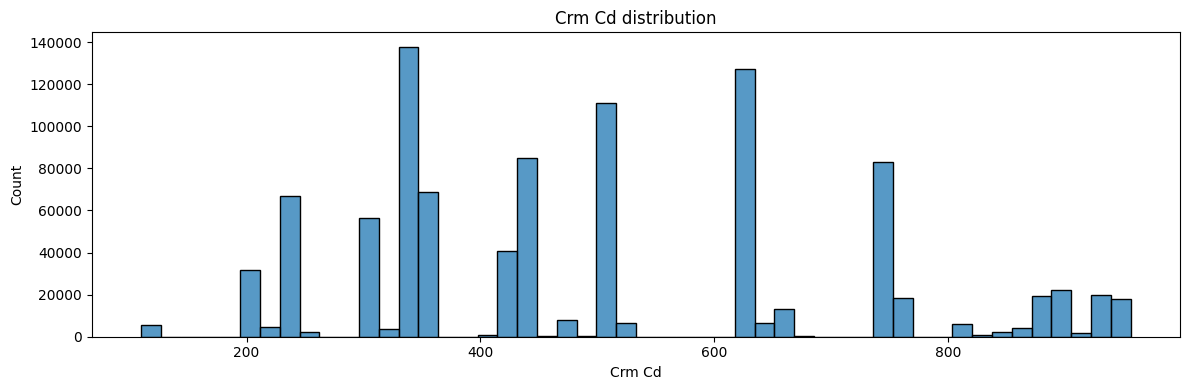

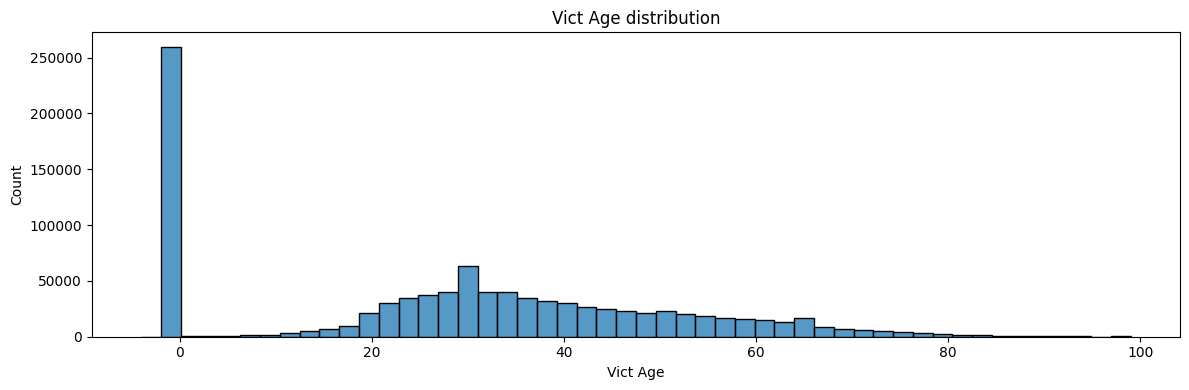

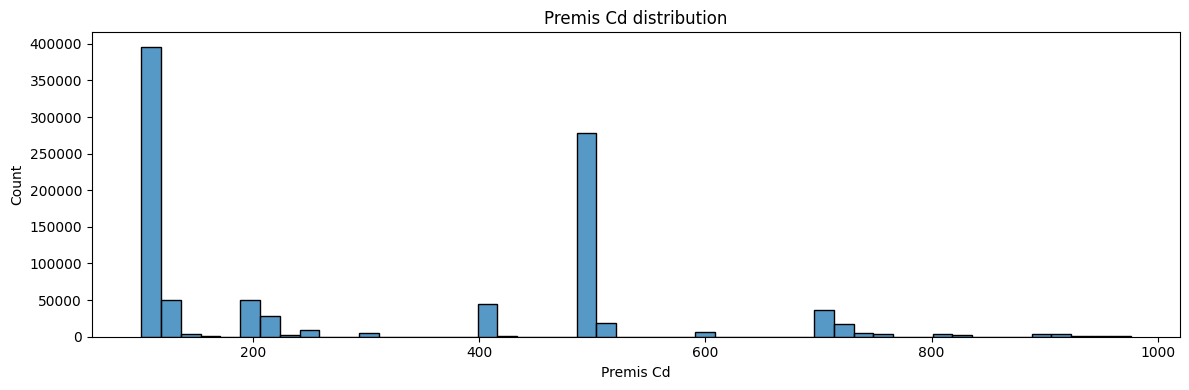

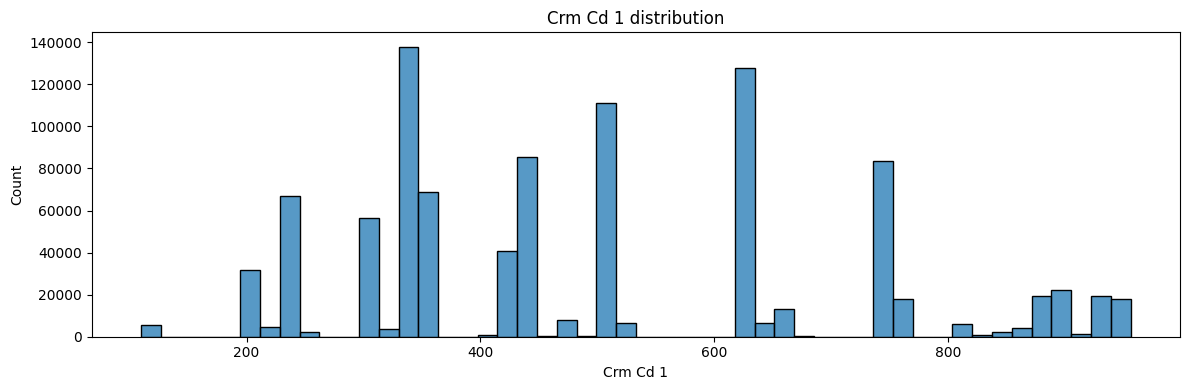

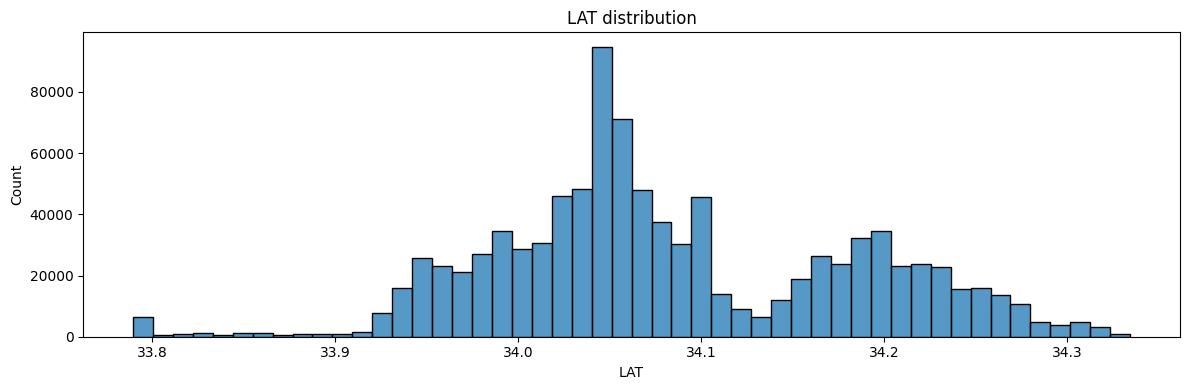

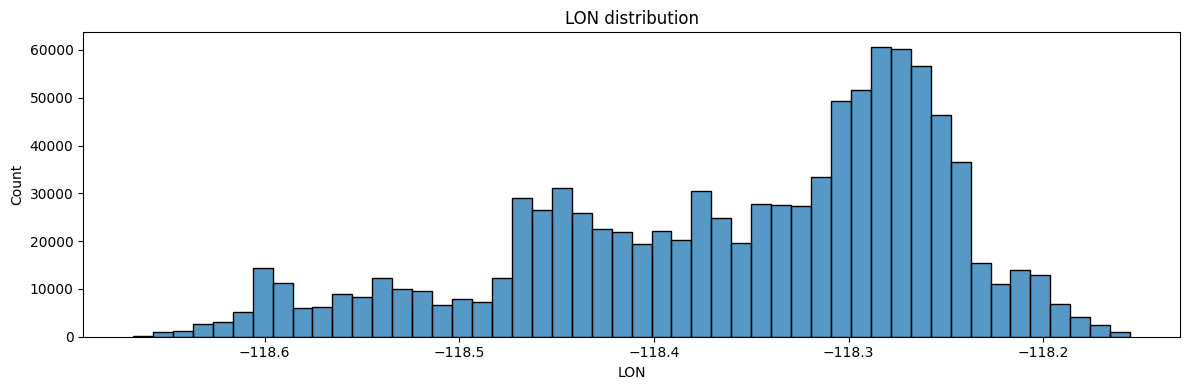

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.histplot(crime_data[col], bins=50, ax=ax)
    ax.set_title(f"{col} distribution")
    plt.tight_layout()
    plt.show()


**Feature Engineering**

In [298]:
crime_data["HOUR"] = (crime_data["TIME OCC"] // 100).clip(0,23).astype(int)

**Save cleaned Dataset**

In [299]:
crime_data.to_csv('Crime_Dataset_cleaned.csv', index=True,index_label="DATE OCC")

In [300]:
crime = pd.read_csv(
    'Crime_Dataset_cleaned.csv',
    parse_dates=['DATE OCC'],   # if you want it back as datetime
    index_col='DATE OCC'
)

print(crime.index.name)  # => "DATE OCC"
print(crime.head())

DATE OCC
            TIME OCC  AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
DATE OCC                                                                 
2020-01-01      1520    13       Newton         1385         2     930   
2020-01-01       300    19      Mission         1982         2     624   
2020-01-01         1    21      Topanga         2177         2     354   
2020-01-01      2030    19      Mission         1905         2     740   
2020-01-01         1    12  77th Street         1204         1     815   

                                                   Crime_type  Vict Age  \
DATE OCC                                                                  
2020-01-01             CRIMINAL THREATS - NO WEAPON DISPLAYED        69   
2020-01-01                           BATTERY - SIMPLE ASSAULT        30   
2020-01-01                                  THEFT OF IDENTITY        32   
2020-01-01  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        44   
2020-01-01            

## Univariate Analysis

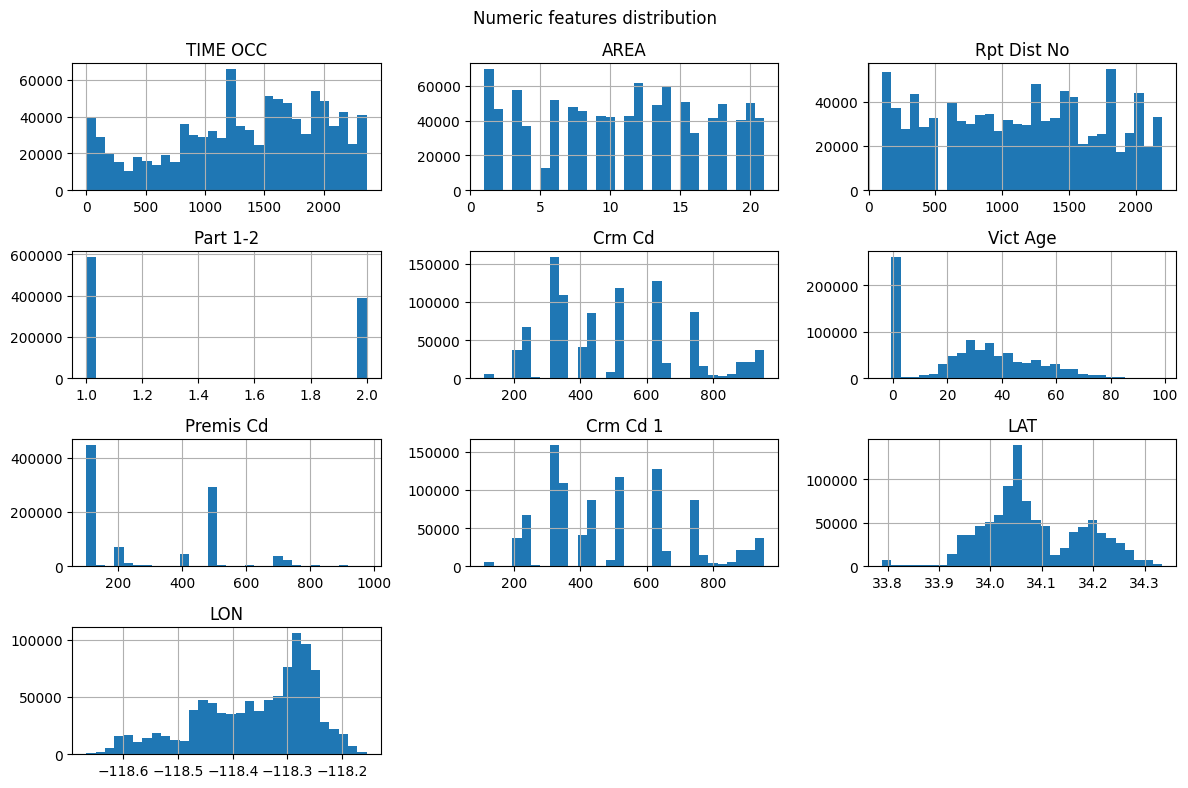

In [301]:
crime[num_cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Numeric features distribution")
plt.tight_layout()
plt.show()

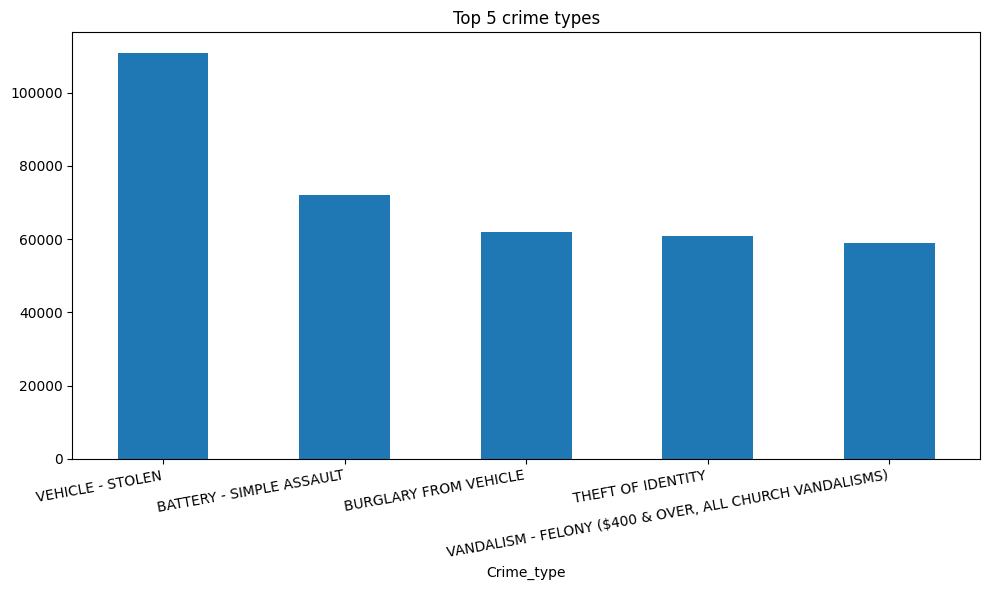

In [302]:

top10 = crime_data['Crime_type'].value_counts().head(5)

top10.plot.bar(figsize=(10,6), title='Top 5 crime types')
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()


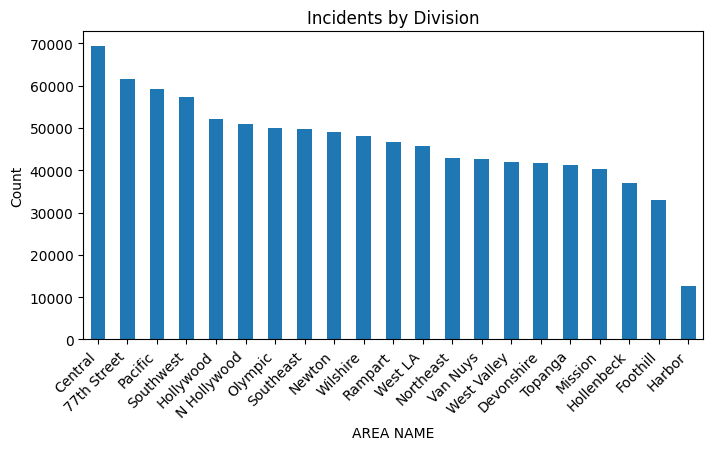

In [303]:
plt.figure(figsize=(8,4))
crime["AREA NAME"].value_counts().plot.bar()
plt.title("Incidents by Division")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

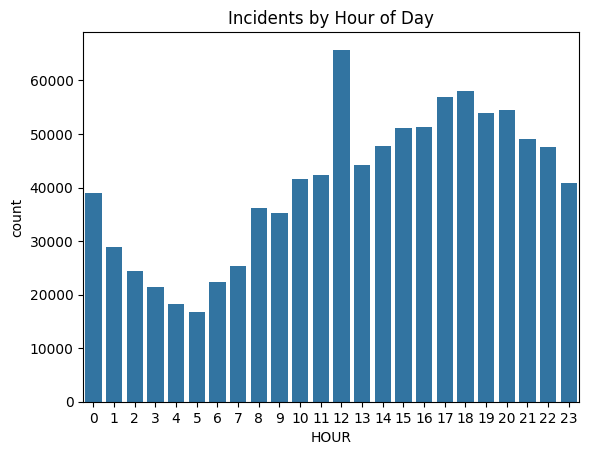

In [304]:
sns.countplot(x="HOUR", data=crime, order=range(24))
plt.title("Incidents by Hour of Day")
plt.show()

## Bivariate Analysis

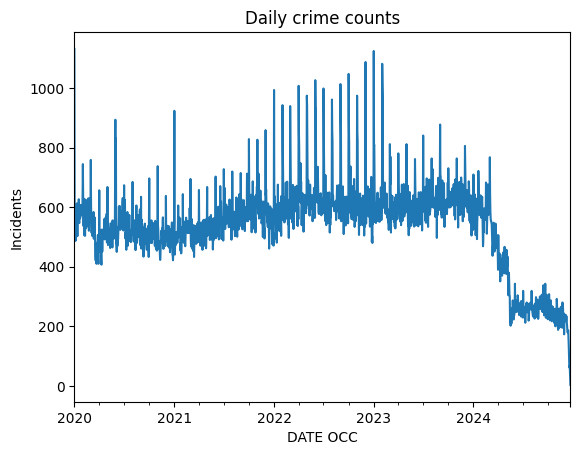

In [305]:
# daily time series of total crime
daily_counts = crime.resample("D").size()
daily_counts.plot(title="Daily crime counts")
plt.ylabel("Incidents")
plt.show()

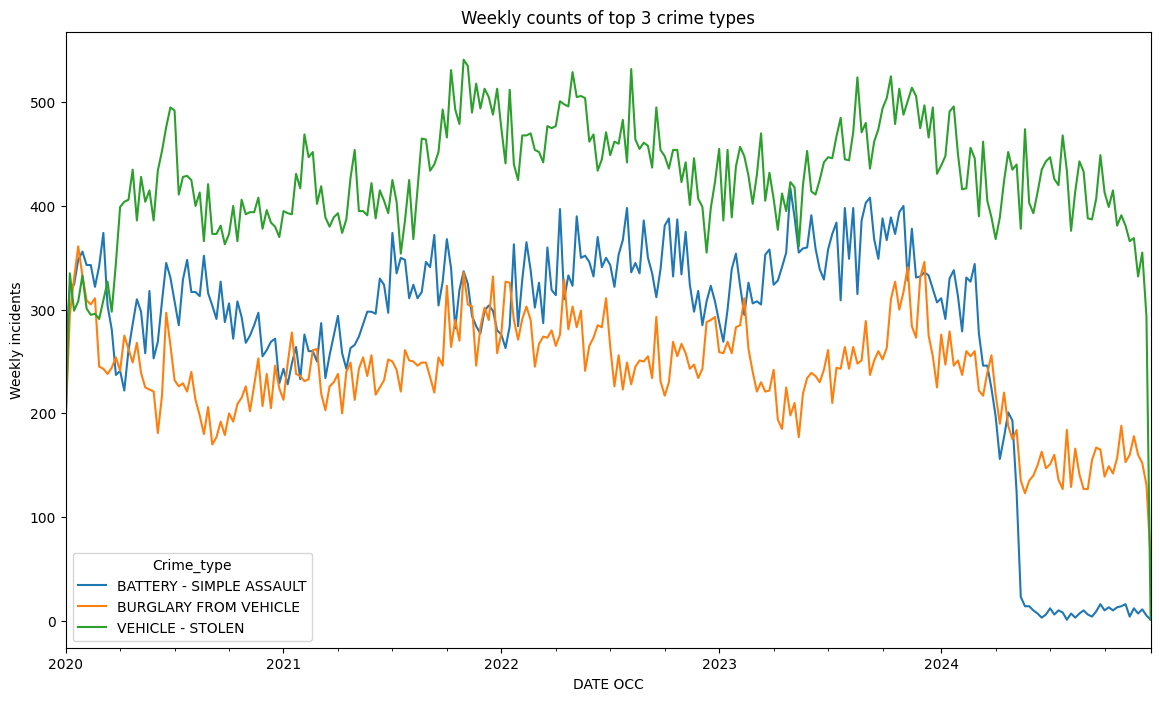

In [306]:
# weekly trends of top 3 crime types
top3 = crime["Crime_type"].value_counts().head(3).index
weekly = (
    crime[crime["Crime_type"].isin(top3)]
      .groupby([pd.Grouper(freq="W"), "Crime_type"])
      .size()
      .unstack()
)
weekly.plot(figsize=(14,8), title="Weekly counts of top 3 crime types")
plt.ylabel("Weekly incidents")
plt.show()

## Multivariate Analysis

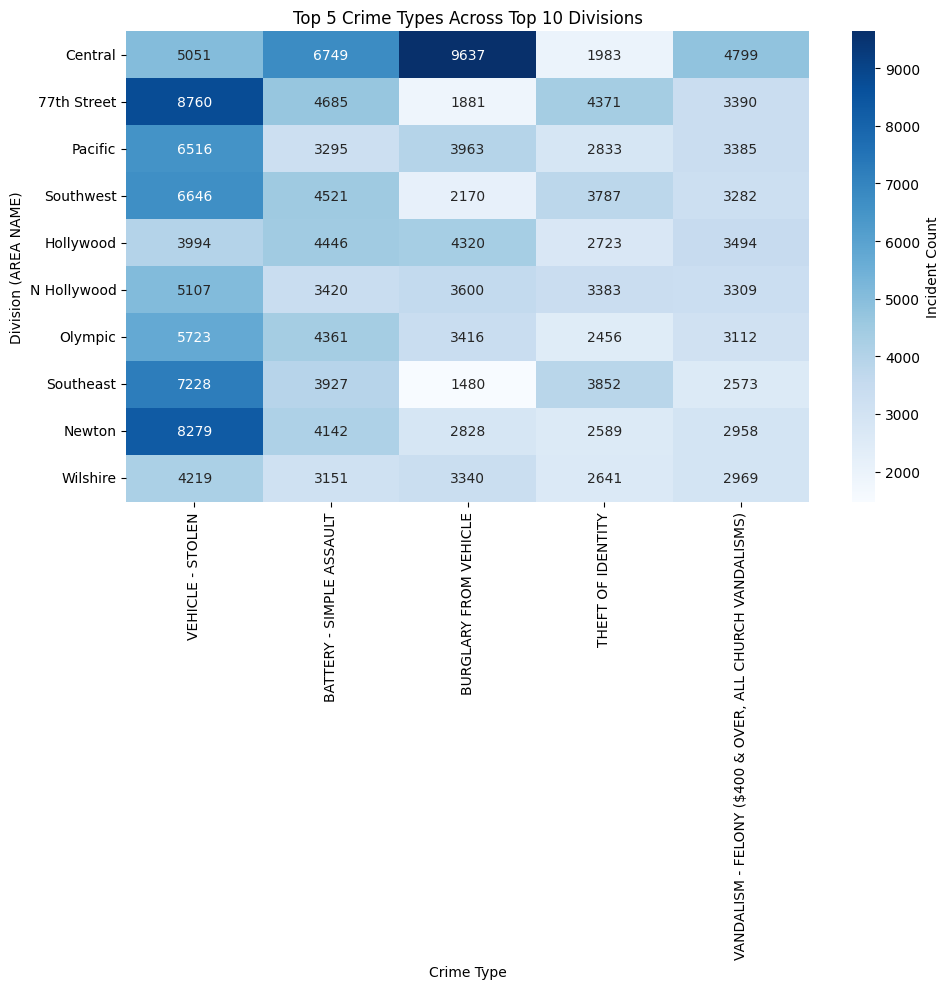

In [307]:
top5 = crime["Crime_type"].value_counts().nlargest(5).index

top_divs = crime["AREA NAME"].value_counts().nlargest(10).index
ct = pd.crosstab(crime["AREA NAME"], crime["Crime_type"]).loc[top_divs, top5]

plt.figure(figsize=(10,10))
sns.heatmap(
    ct,
    annot=True, fmt="d",
    cmap="Blues",
    cbar_kws={'label': 'Incident Count'}
)
plt.title("Top 5 Crime Types Across Top 10 Divisions")
plt.ylabel("Division (AREA NAME)")
plt.xlabel("Crime Type")
plt.tight_layout()
plt.show()

## Correlation Analysis

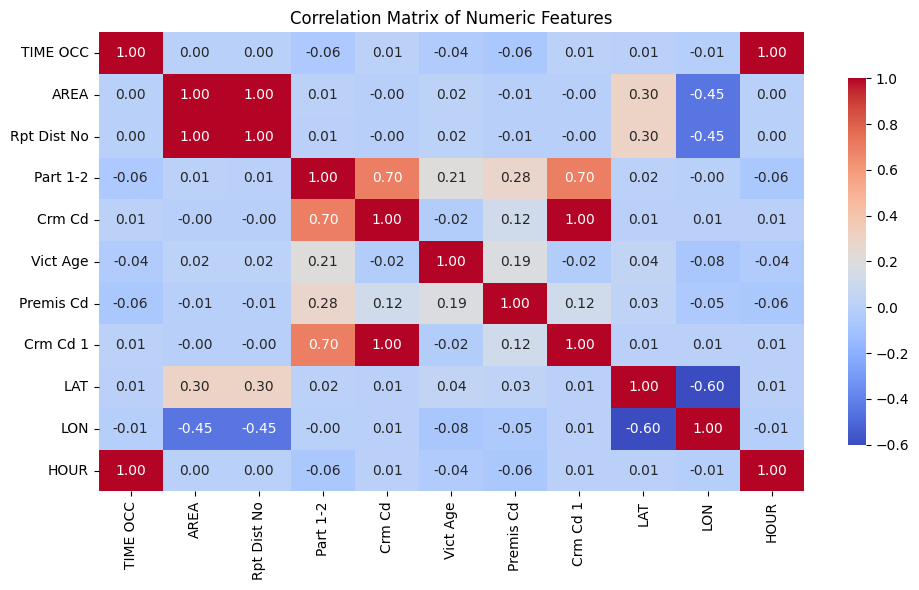

In [308]:
num_cols = crime.select_dtypes(include="number").columns.tolist()

# compute
corr = crime[num_cols].corr()

# plot
plt.figure(figsize=(10,6))
sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'shrink':.8}
)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


## Model construction/ Methodology

1. Can crime forecasting models support decision-making for law enforcement and public safety planning?

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1035 - mae: 0.2653 - val_loss: 0.0244 - val_mae: 0.1260
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0294 - mae: 0.1374 - val_loss: 0.0210 - val_mae: 0.1132
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0295 - mae: 0.1378 - val_loss: 0.0209 - val_mae: 0.1124
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0297 - mae: 0.1383 - val_loss: 0.0208 - val_mae: 0.1127
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0296 - mae: 0.1384 - val_loss: 0.0209 - val_mae: 0.1130
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0295 - mae: 0.1382 - val_loss: 0.0209 - val_mae: 0.1132
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0295 - mae: 0.1381 - val_loss: 0.0209 - val_mae: 0.1132
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0294 - mae: 0.1379 - val_loss: 0.0208 - val_mae: 0.1132
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0294 - mae: 0.

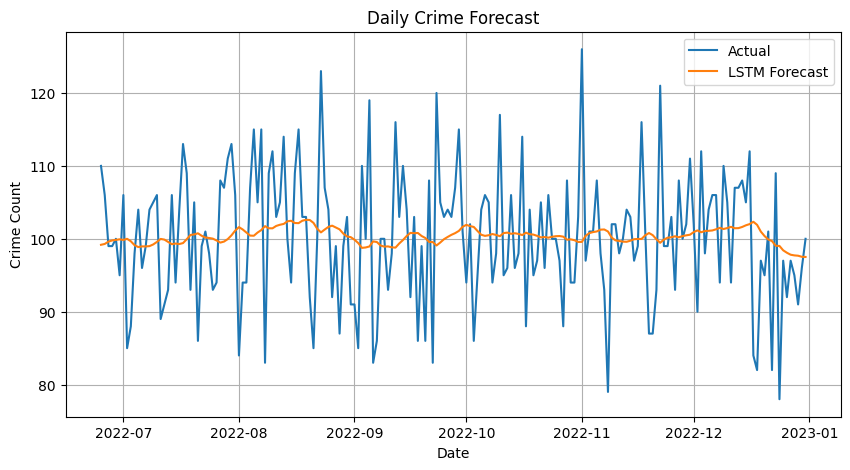

In [309]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Load or simulate data
dates = pd.date_range("2020-01-01", "2022-12-31", freq="D")
counts = np.random.poisson(lam=100, size=len(dates))
df = pd.DataFrame({"DATE": dates, "crime_count": counts})

# 3. Chronological split
split_idx = int(len(df) * 0.8)
train = df["crime_count"].values[:split_idx].reshape(-1,1)
test  = df["crime_count"].values[split_idx:].reshape(-1,1)

# 4. Scale on train only
scaler       = MinMaxScaler().fit(train)
train_scaled = scaler.transform(train)
test_scaled  = scaler.transform(test)

# 5. Create 30-day sequences
def seqs(data, ws=30):
    X,y = [],[]
    for i in range(len(data)-ws):
        X.append(data[i:i+ws])
        y.append(data[i+ws])
    return np.array(X), np.array(y)

X_train, y_train = seqs(train_scaled)
X_test,  y_test  = seqs(test_scaled)

X_train = X_train.reshape(-1,30,1)
X_test  = X_test .reshape(-1,30,1)

# 6. Build & compile LSTM
model = Sequential([
    LSTM(64, input_shape=(30,1)),
    Dense(1)
])
model.compile("adam", "mse", metrics=["mae"])

# 7. Train with early stopping
es = EarlyStopping("val_loss", patience=5, restore_best_weights=True)
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=50, batch_size=32,
          callbacks=[es], verbose=1)

# 8. Predict & invert scale
y_pred = model.predict(X_test)
y_true = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

# 9. Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# 10. Plot
test_dates = df["DATE"].iloc[split_idx + 30:]
plt.figure(figsize=(10,5))
plt.plot(test_dates, y_true, label="Actual")
plt.plot(test_dates, y_pred, label="LSTM Forecast")
plt.title("Daily Crime Forecast")
plt.xlabel("Date"); plt.ylabel("Crime Count")
plt.legend(); plt.grid(True)
plt.show()


2. How precisely do historical patterns help forecast daily crime counts in Los Angeles?

In [310]:
print(crime.columns.tolist())


['TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crime_type', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON', 'HOUR']


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mae: 0.0932 - val_loss: 0.0081 - val_mae: 0.0787
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0089 - mae: 0.0638 - val_loss: 0.0101 - val_mae: 0.0895
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0080 - mae: 0.0617 - val_loss: 0.0096 - val_mae: 0.0869
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0079 - mae: 0.0623 - val_loss: 0.0058 - val_mae: 0.0642
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 - mae: 0.0608 - val_loss: 0.0045 - val_mae: 0.0529
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072 - mae: 0.0590 - val_loss: 0.0041 - val_mae: 0.0491
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0072 - mae: 0.0589 - val_loss: 0.0042 - val_mae: 0.0478
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0072 - mae: 0.0588 - val_loss: 0.0045 - val_mae: 0.0490
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073 - mae: 0.0

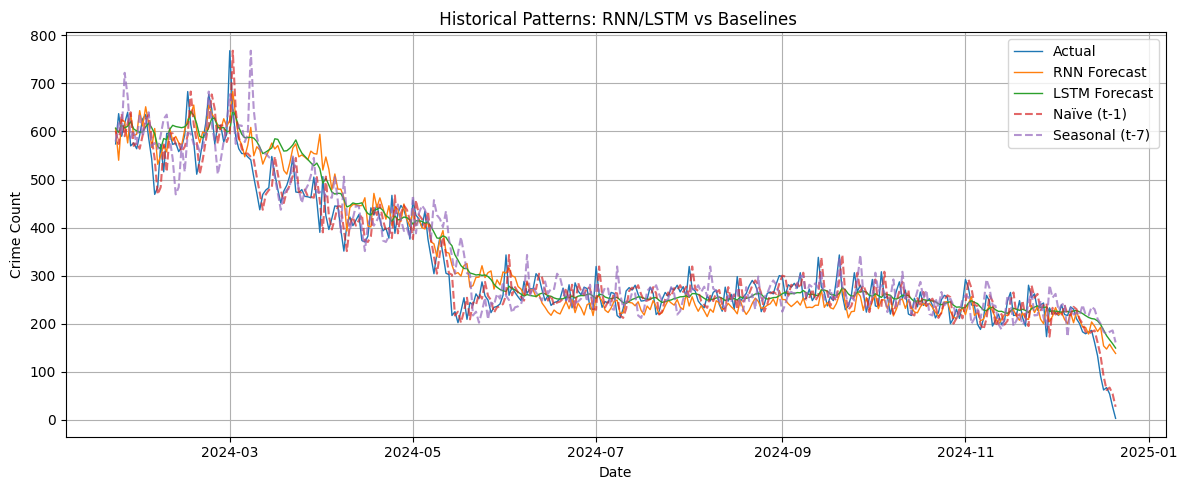

In [311]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models    import Sequential
from tensorflow.keras.layers    import SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing      import MinMaxScaler
from sklearn.metrics            import mean_squared_error, mean_absolute_error

# 1. Reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Aggregate your actual daily counts into a Series
#    Assumes `crime` is your DataFrame with a DatetimeIndex
daily = (
    crime
      .resample("D")
      .size()
      .rename("crime_count")   # Series with DatetimeIndex
)

# 3. Train/test split
window    = 30
split_idx = int(len(daily) * 0.8)

train = daily.iloc[:split_idx]
test  = daily.iloc[split_idx:]

# 4. Scale to [0,1]
scaler   = MinMaxScaler().fit(train.values.reshape(-1,1))
train_s  = scaler.transform(train.values.reshape(-1,1))
test_s   = scaler.transform(test.values.reshape(-1,1))

# 5. Build sliding‐window sequences
def make_seqs(arr, ws=window):
    X, y = [], []
    for i in range(len(arr) - ws):
        X.append(arr[i : i+ws])
        y.append(arr[i+ws])
    return np.array(X), np.array(y)

X_train, y_train = make_seqs(train_s)
X_test,  y_test  = make_seqs(test_s)

# reshape for RNN/LSTM: (samples, timesteps, features)
X_train = X_train.reshape(-1, window, 1)
X_test  = X_test.reshape(-1, window, 1)

# 6. Grab the test dates for plotting
#    We skip the first `window` days of the test set because
#    our first prediction corresponds to test.index[window]
test_dates = test.index[window:]

# 7. Define & compile models
rnn  = Sequential([ SimpleRNN(64, input_shape=(window,1)), Dense(1) ])
lstm = Sequential([ LSTM(64,  input_shape=(window,1)), Dense(1) ])

for m in (rnn, lstm):
    m.compile(optimizer="adam", loss="mse", metrics=["mae"])

# 8. Train with EarlyStopping
es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

rnn.fit( X_train, y_train,
         validation_data=(X_test, y_test),
         epochs=50, batch_size=32,
         callbacks=[es],
         verbose=1 )

lstm.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs=50, batch_size=32,
         callbacks=[es],
         verbose=1 )

# 9. Predict & invert scaling
pred_rnn   = scaler.inverse_transform(rnn.predict(X_test))
pred_lstm  = scaler.inverse_transform(lstm.predict(X_test))
true_vals  = scaler.inverse_transform(y_test)

# 10. Compute RNN/LSTM metrics
print("\n--- RNN & LSTM ---")
for name, pred in [("RNN", pred_rnn), ("LSTM", pred_lstm)]:
    rmse = np.sqrt(mean_squared_error(true_vals, pred))
    mae  = mean_absolute_error(true_vals, pred)
    print(f"{name:5} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# 11. Baseline 1-day naive (t-1)
base = daily.shift(1).iloc[split_idx + window:]
true_base = daily.iloc[split_idx + window:]
rmse_naive = np.sqrt(mean_squared_error(true_base, base))
mae_naive  = mean_absolute_error(true_base, base)
print(f"Naïve (t-1)        → RMSE: {rmse_naive:.2f}, MAE: {mae_naive:.2f}")

# 12. Baseline 7-day seasonal naïve (t-7)
seasonal = daily.shift(7).iloc[split_idx + window:]
rmse_seasonal = np.sqrt(mean_squared_error(true_base, seasonal))
mae_seasonal  = mean_absolute_error(true_base, seasonal)
print(f"Seasonal (t-7)     → RMSE: {rmse_seasonal:.2f}, MAE: {mae_seasonal:.2f}\n")

# 13. Plot all forecasts together
plt.figure(figsize=(12,5))
plt.plot(test_dates, true_vals,           label="Actual",            linewidth=1)
plt.plot(test_dates, pred_rnn,            label="RNN Forecast",      linewidth=1)
plt.plot(test_dates, pred_lstm,           label="LSTM Forecast",     linewidth=1)
plt.plot(test_dates, base.values,         label="Naïve (t-1)",       linestyle="--", alpha=0.7)
plt.plot(test_dates, seasonal.values,     label="Seasonal (t-7)",    linestyle="--", alpha=0.7)
plt.title(" Historical Patterns: RNN/LSTM vs Baselines")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


3. Can we predict the most likely dates or time periods of criminal activity in Los Angeles based on crime type, location, victim demographics, and other associated factors?


In [312]:
print(crime.columns)


Index(['TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd',
       'Crime_type', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT',
       'LON', 'HOUR'],
      dtype='object')


In [313]:
# 1) Strip any stray spaces from all your column names
crime.columns = crime.columns.str.strip()

# 2) Rename the original description column to 'Crime_type'
crime.rename(
    columns={"Crm Cd Desc": "Crime_type"},
    inplace=True
)

type_ct = (
    crime
      .reset_index()              # brings "DATE OCC" back as a column
      .pivot_table(
         index="DATE OCC",       # exactly that, with the space
         columns="Crime_type",   # lowercase
         aggfunc="size",
         fill_value=0
      )
      .add_prefix("type_")
)



In [314]:
# 4) VICTIM-DEMOGRAPHICS
# -----------------------
# 4) VICTIM-DEMOGRAPHICS
demog = (
    crime
      .resample("D")
      .agg(
         vict_age_mean = ("Vict Age", "mean"),
         pct_female    = ("Vict Sex", lambda s: np.mean(s=="F"))
      )
)


top5 = crime["AREA NAME"].value_counts().nlargest(5).index
area_ct = (
    crime[ crime["AREA NAME"].isin(top5) ]
      .reset_index()
      .pivot_table(
         index="DATE OCC",
         columns="AREA NAME",
         aggfunc="size",
         fill_value=0
      )
)
area_ct.columns = [f"area_{c}" for c in area_ct.columns]

# 3) TOTAL DAILY COUNT
# ---------------------
daily_count = crime.resample("D").size().rename("crime_count")


# 5) CALENDAR FEATURES
# ----------------------
cal = pd.DataFrame(index=daily_count.index)
cal["day_of_week"] = cal.index.dayofweek   # 0=Mon…6=Sun
cal["month"]       = cal.index.month

# 6) ASSEMBLE DAILY DATAFRAME
# -----------------------------
daily = pd.concat([
    daily_count,
    type_ct,
    area_ct,
    demog,
    cal
], axis=1).fillna(0)

print("Daily feature table shape:", daily.shape)
daily.head()

Daily feature table shape: (1817, 149)


,crime_count,type_ARSON,type_ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"type_ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",type_ATTEMPTED ROBBERY,type_BATTERY - SIMPLE ASSAULT,type_BATTERY ON A FIREFIGHTER,type_BATTERY POLICE (SIMPLE),type_BATTERY WITH SEXUAL CONTACT,"type_BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",...,type_WEAPONS POSSESSION/BOMBING,area_77th Street,area_Central,area_Hollywood,area_Pacific,area_Southwest,vict_age_mean,pct_female,day_of_week,month
DATE OCC,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1132,4,0,47,4,71,1,5,24,0,...,0,85.0,60.0,66.0,44.0,54.0,30.860424,0.514134,2,1
2020-01-02,506,4,0,23,0,42,0,1,2,0,...,0,34.0,39.0,26.0,27.0,29.0,31.586957,0.357708,3,1
2020-01-03,580,1,0,17,1,40,0,2,2,0,...,0,53.0,42.0,21.0,32.0,28.0,31.274138,0.400000,4,1
2020-01-04,528,1,0,24,1,58,0,1,3,0,...,0,40.0,38.0,24.0,31.0,43.0,32.142045,0.399621,5,1
2020-01-05,487,1,1,21,4,49,0,0,3,0,...,0,46.0,30.0,21.0,24.0,31.0,31.268994,0.392197,6,1


In [315]:
from sklearn.preprocessing import MinMaxScaler

# scale everything into [0,1]
scaler = MinMaxScaler().fit(daily.values)
scaled = scaler.transform(daily.values)

# build 30-day → next-day training examples
def make_seqs(X, w=30):
    Xs, ys = [], []
    for i in range(len(X) - w):
        Xs.append(X[i:i+w])
        ys.append(X[i+w, 0])   # target = crime_count at next day
    return np.array(Xs), np.array(ys)

WINDOW = 30
X, y = make_seqs(scaled, WINDOW)
print("X:", X.shape, " y:", y.shape)


X: (1787, 30, 149)  y: (1787,)


In [316]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [317]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(64, input_shape=(WINDOW, X.shape[2])),
    Dense(1)
])
model.compile("adam", "mse", metrics=["mae"])
es = EarlyStopping("val_loss", patience=5, restore_best_weights=True)

model.fit(
  X_train, y_train,
  validation_data=(X_test, y_test),
  epochs=50, batch_size=32,
  callbacks=[es]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0764 - mae: 0.2084 - val_loss: 0.0064 - val_mae: 0.0660
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0052 - mae: 0.0506 - val_loss: 0.0045 - val_mae: 0.0545
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0043 - mae: 0.0452 - val_loss: 0.0040 - val_mae: 0.0507
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0040 - mae: 0.0436 - val_loss: 0.0037 - val_mae: 0.0484
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0038 - mae: 0.0419 - val_loss: 0.0035 - val_mae: 0.0462
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0036 - mae: 0.0407 - val_loss: 0.0033 - val_mae: 0.0448
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0034 - mae: 0.0400 - val_loss: 0.0032 - val_mae: 0.0437
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0033 - mae: 0.0395 - val_loss: 0.0031 - val_mae: 0.0428
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0032 - mae: 0.

In [318]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test).flatten()

# only invert the first (crime_count) dimension
inv = np.zeros((len(y_test), scaled.shape[1]))
inv[:,0] = y_test
ip = inv.copy(); ip[:,0] = y_pred

y_true = scaler.inverse_transform(inv)[:,0]
y_hat  = scaler.inverse_transform(ip)[:,0]

print("RMSE:", np.sqrt(mean_squared_error(y_true, y_hat)))
print("MAE:",  mean_absolute_error(y_true, y_hat))


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE: 60.26610177740859
MAE: 45.816483783363964


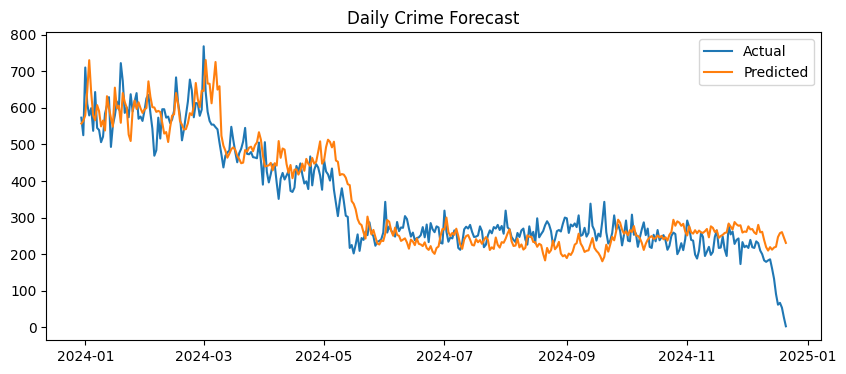

In [319]:
import matplotlib.pyplot as plt
dates = daily.index[split+WINDOW:]

plt.figure(figsize=(10,4))
plt.plot(dates, y_true, label="Actual")
plt.plot(dates, y_hat, label="Predicted")
plt.legend(); plt.title("Daily Crime Forecast"); plt.show()


4. When it comes to crime prediction which offenses offer better anticipation results and do specific crimes such as theft and assault behave differently during predictions?

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
                                                    rmse_naive  mae_naive  \
offense                                                                     
BURGLARY FROM VEHICLE                                 7.927530   6.327824   
THEFT OF IDENTITY                                     9.618050   6.418733   
BATTERY - SIMPLE ASSAULT                              6.328485   3.983425   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...    7.143743   5.363636   
VEHICLE - STOLEN                                     11.721091   9.356354   

                                                    rmse_lstm  mae_lstm  
offense                                                                  
BURGLARY FROM VEHICLE                                6.110474  4.928805  
THEFT OF IDENTITY                                    8.367543  5.858705  
BATTERY - SIMPLE ASSAULT                             8.529435  7.820913  
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...

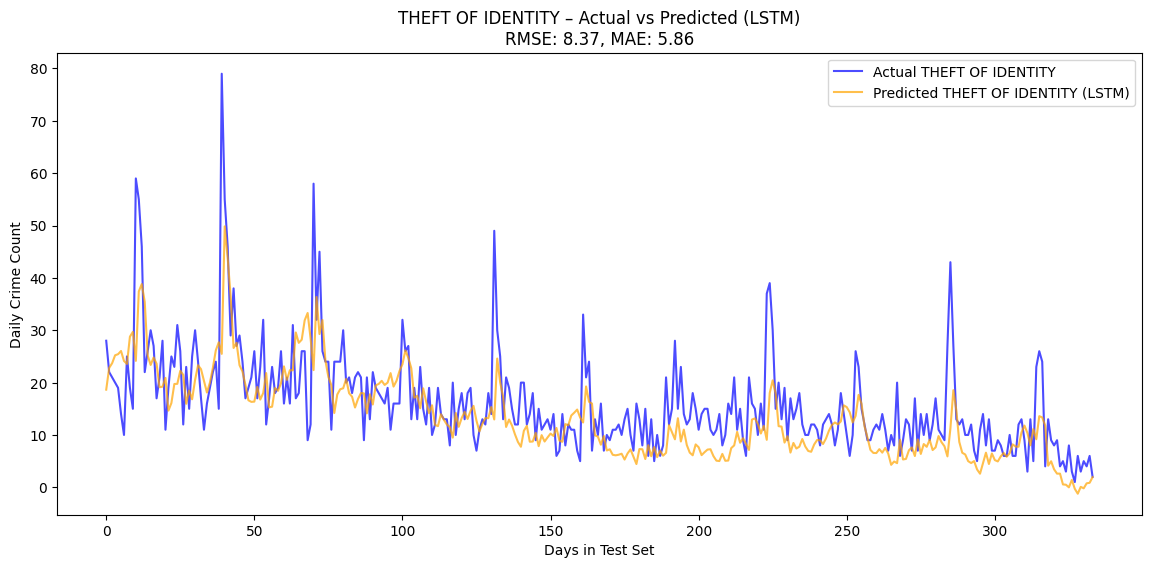

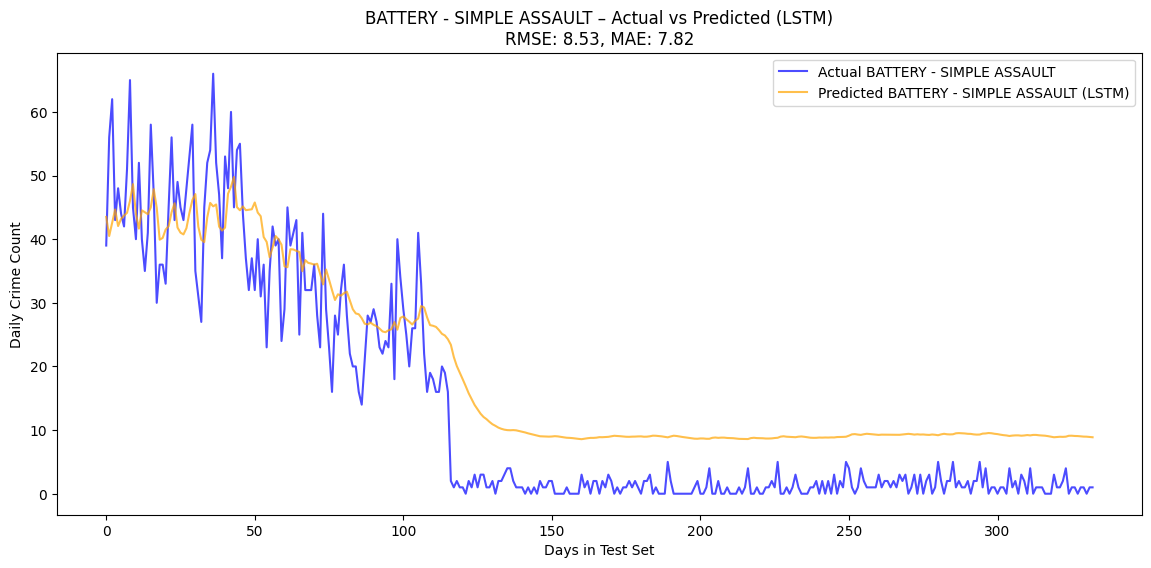

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics        import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models    import Sequential
from tensorflow.keras.layers    import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 1) Loop over your top 5 offenses, collect metrics + store forecasts
top_offenses = (
    crime["Crime_type"]
      .value_counts()
      .nlargest(5)
      .index
      .tolist()
)

window = 30
results     = []
offense_data = {}

def make_seq(arr, ws):
    X, y = [], []
    for i in range(len(arr) - ws):
        X.append(arr[i : i+ws])
        y.append(arr[i+ws])
    return np.array(X), np.array(y)

for off in top_offenses:
    # aggregate daily counts
    daily_off = (
        crime[crime["Crime_type"] == off]
          .resample("D")
          .size()
          .rename("count")
    )
    # train/test split
    split_idx = int(len(daily_off) * 0.8)
    train_off = daily_off.iloc[:split_idx]
    test_off  = daily_off.iloc[split_idx:]

    # naive baseline
    naive_pred = test_off.shift(1).dropna()
    true_naive = test_off.iloc[1:]
    rmse_naive = np.sqrt(mean_squared_error(true_naive, naive_pred))
    mae_naive  = mean_absolute_error(true_naive, naive_pred)

    # scale
    scaler   = MinMaxScaler().fit(train_off.values.reshape(-1,1))
    train_s  = scaler.transform(train_off.values.reshape(-1,1))
    test_s   = scaler.transform(test_off.values.reshape(-1,1))

    # make sequences
    X_tr, y_tr = make_seq(train_s, window)
    X_te, y_te = make_seq(test_s,  window)
    X_tr = X_tr.reshape(-1, window, 1)
    X_te = X_te.reshape(-1, window, 1)

    # train LSTM
    model = Sequential([LSTM(64, input_shape=(window,1)), Dense(1)])
    model.compile("adam", "mse")
    es = EarlyStopping("val_loss", patience=5, restore_best_weights=True)
    model.fit(X_tr, y_tr,
              validation_data=(X_te, y_te),
              epochs=50, batch_size=32,
              callbacks=[es], verbose=0)

    # forecast & invert
    y_pred_s = model.predict(X_te)
    y_pred   = scaler.inverse_transform(y_pred_s).flatten()
    y_true   = scaler.inverse_transform(y_te.reshape(-1,1)).flatten()

    rmse_lstm = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_lstm  = mean_absolute_error(y_true, y_pred)

    # save metrics
    results.append({
        "offense":   off,
        "rmse_naive":rmse_naive,
        "mae_naive": mae_naive,
        "rmse_lstm": rmse_lstm,
        "mae_lstm":  mae_lstm
    })
    # save series
    offense_data[off] = {
        "y_true": y_true,
        "y_pred": y_pred
    }

results_df = (
    pd.DataFrame(results)
      .set_index("offense")
      .sort_values("rmse_lstm")
)
print(results_df)

# 2) Identify the exact labels for "Theft" and "Assault"
theft_off   = [off for off in results_df.index if "THEFT"  in off.upper()][0]
assault_off = [off for off in results_df.index if "ASSAULT" in off.upper()][0]

# 3) Plot Actual vs Predicted for Theft
y_true_th = offense_data[theft_off]["y_true"]
y_pred_th = offense_data[theft_off]["y_pred"]

plt.figure(figsize=(14, 6))
plt.plot(y_true_th, label=f'Actual {theft_off}', color='blue', alpha=0.7)
plt.plot(y_pred_th, label=f'Predicted {theft_off} (LSTM)', color='orange', alpha=0.7)
plt.title(f'{theft_off} – Actual vs Predicted (LSTM)\n'
          f'RMSE: {results_df.loc[theft_off,"rmse_lstm"]:.2f}, '
          f'MAE: {results_df.loc[theft_off,"mae_lstm"]:.2f}')
plt.xlabel('Days in Test Set')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.show()

# 4) Plot Actual vs Predicted for Assault
y_true_as = offense_data[assault_off]["y_true"]
y_pred_as = offense_data[assault_off]["y_pred"]

plt.figure(figsize=(14, 6))
plt.plot(y_true_as, label=f'Actual {assault_off}', color='blue', alpha=0.7)
plt.plot(y_pred_as, label=f'Predicted {assault_off} (LSTM)', color='orange', alpha=0.7)
plt.title(f'{assault_off} – Actual vs Predicted (LSTM)\n'
          f'RMSE: {results_df.loc[assault_off,"rmse_lstm"]:.2f}, '
          f'MAE: {results_df.loc[assault_off,"mae_lstm"]:.2f}')
plt.xlabel('Days in Test Set')
plt.ylabel('Daily Crime Count')
plt.legend()
plt.show()


5. Do specific regions of Los Angeles experience higher crime frequency while being predictable for crime detection?


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Top 5 Regions with Highest Crime Frequency:

             rmse_naive  mae_naive  rmse_lstm   mae_lstm
region                                                  
Hollywood      6.720547   5.182320   6.100500   5.052617
Pacific        7.443711   5.723757   7.238239   6.037760
Central        9.890980   7.825967   8.582295   6.934273
Southwest      8.033676   6.369146   8.836243   7.358991
77th Street    7.011404   5.148760  11.523796  10.342501


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


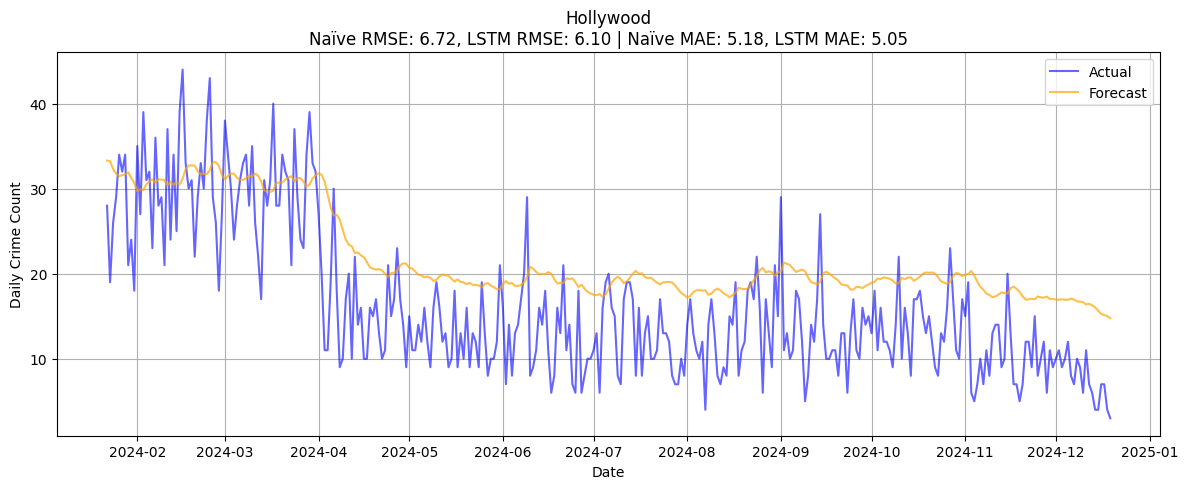

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


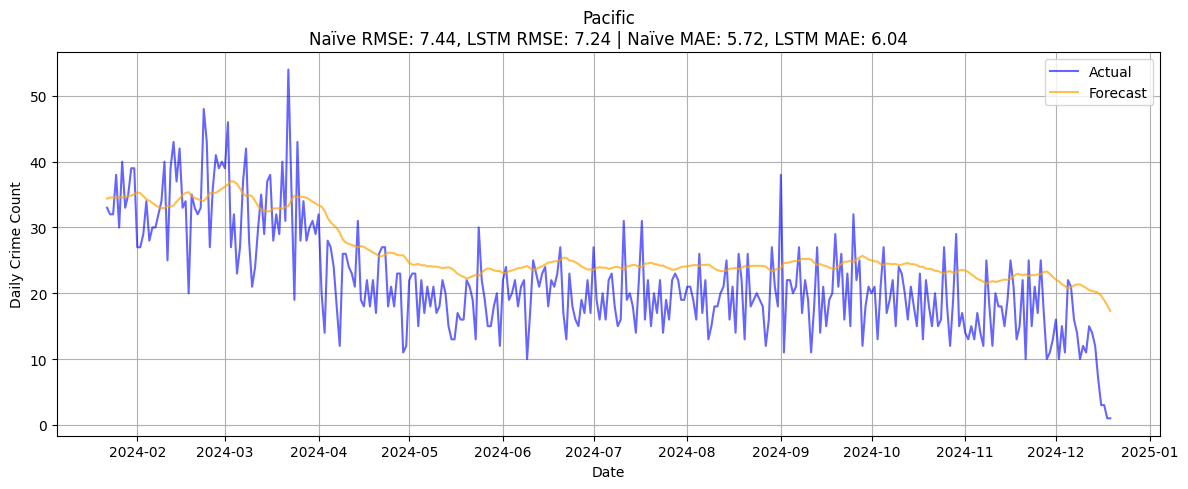

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


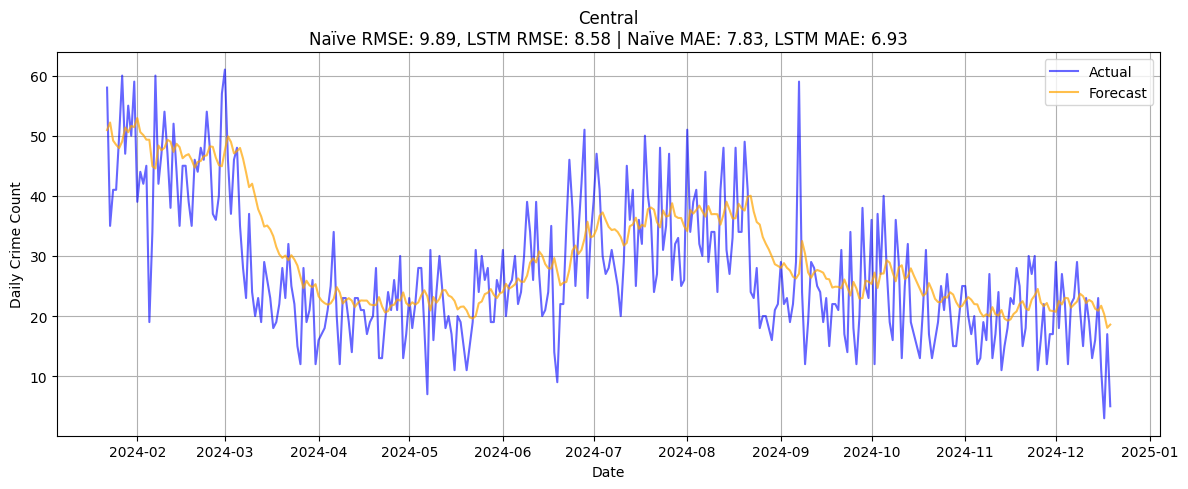

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


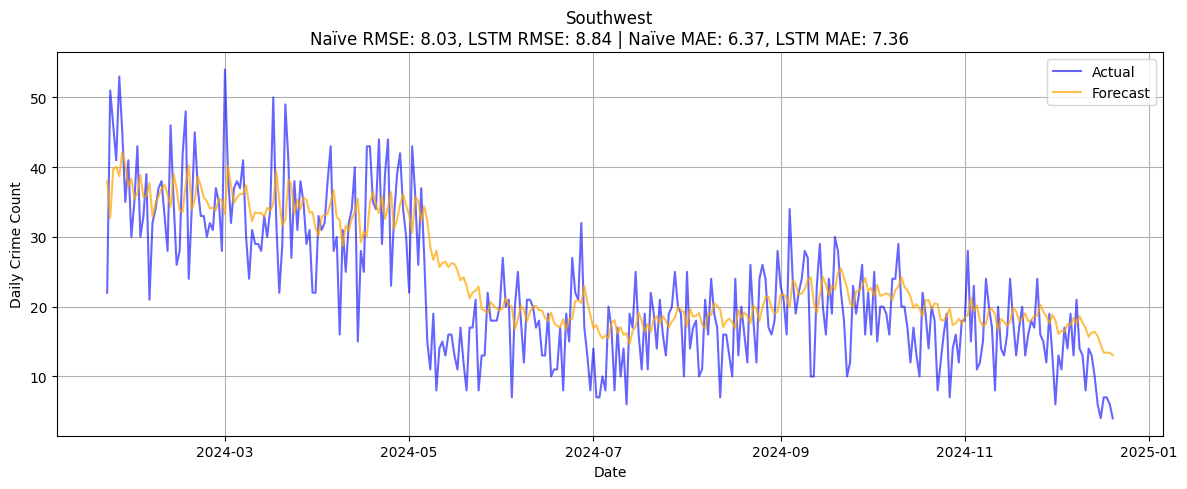

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


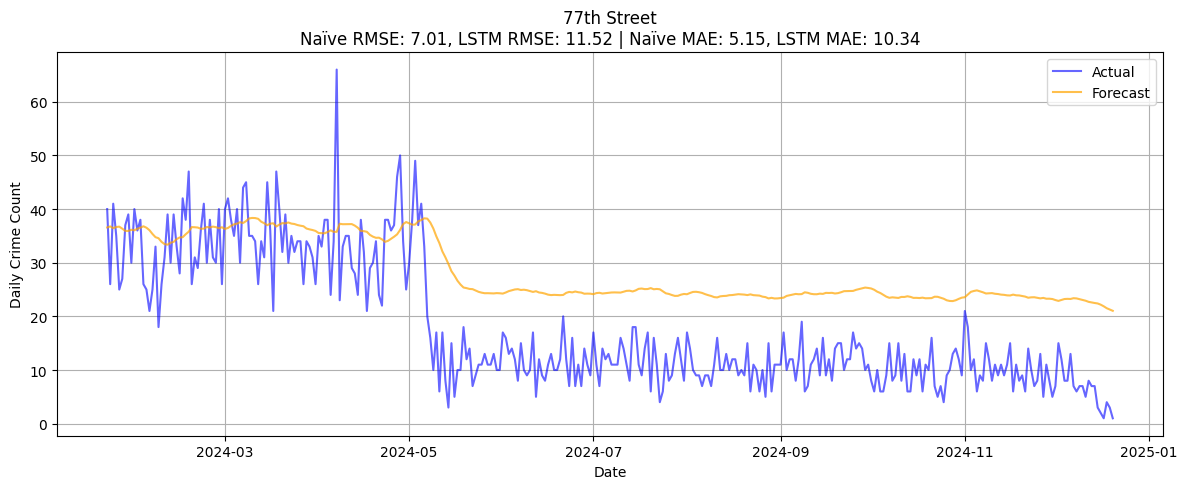

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics        import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models    import Sequential
from tensorflow.keras.layers    import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 1) Top 5 regions by volume
top_regions = (
    crime["AREA NAME"]
      .value_counts()
      .nlargest(5)
      .index
      .tolist()
)

window = 30
results = []

# 2) Loop to collect metrics
for region in top_regions:
    daily = (
        crime[crime["AREA NAME"] == region]
          .resample("D")
          .size()
          .rename("count")
    )
    split = int(len(daily) * 0.8)
    train, test = daily.iloc[:split], daily.iloc[split:]

    # naive baseline
    naive_pred = test.shift(1).dropna()
    true_naive = test.iloc[1:]
    rmse_naive = np.sqrt(mean_squared_error(true_naive, naive_pred))
    mae_naive  = mean_absolute_error(true_naive, naive_pred)

    # scale
    scaler  = MinMaxScaler().fit(train.values.reshape(-1,1))
    train_s = scaler.transform(train.values.reshape(-1,1))
    test_s  = scaler.transform(test.values.reshape(-1,1))

    # windowing
    def make_seq(arr, ws):
        X, y = [], []
        for i in range(len(arr) - ws):
            X.append(arr[i:i+ws])
            y.append(arr[i+ws])
        return np.array(X), np.array(y)

    X_tr, y_tr = make_seq(train_s, window)
    X_te, y_te = make_seq(test_s,  window)
    X_tr = X_tr.reshape(-1, window, 1)
    X_te = X_te.reshape(-1, window, 1)

    # train LSTM
    model = Sequential([LSTM(64, input_shape=(window,1)), Dense(1)])
    model.compile("adam", "mse")
    es = EarlyStopping("val_loss", patience=5, restore_best_weights=True)
    model.fit(X_tr, y_tr,
              validation_data=(X_te, y_te),
              epochs=50, batch_size=32,
              callbacks=[es], verbose=0)

    # forecast & invert
    y_pred_s = model.predict(X_te)
    y_pred   = scaler.inverse_transform(y_pred_s).flatten()
    y_true   = scaler.inverse_transform(y_te.reshape(-1,1)).flatten()

    rmse_lstm = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_lstm  = mean_absolute_error(y_true, y_pred)

    results.append({
        "region":     region,
        "rmse_naive": rmse_naive,
        "mae_naive":  mae_naive,
        "rmse_lstm":  rmse_lstm,
        "mae_lstm":   mae_lstm
    })

# 3) Build and display the results table
results_df = (
    pd.DataFrame(results)
      .set_index("region")
      .sort_values("rmse_lstm")
)
print("Top 5 Regions with Highest Crime Frequency:\n")
print(results_df)

# 4) Plot Actual vs Forecast for each region
for region in results_df.index:
    metrics = results_df.loc[region]
    # re-aggregate and re-run forecasts to get time series
    daily = (
        crime[crime["AREA NAME"] == region]
          .resample("D")
          .size()
          .rename("count")
    )
    split = int(len(daily) * 0.8)
    train, test = daily.iloc[:split], daily.iloc[split:]

    scaler  = MinMaxScaler().fit(train.values.reshape(-1,1))
    train_s = scaler.transform(train.values.reshape(-1,1))
    test_s  = scaler.transform(test.values.reshape(-1,1))
    X_tr, y_tr = make_seq(train_s, window)
    X_te, y_te = make_seq(test_s,  window)
    X_te = X_te.reshape(-1, window, 1)

    model = Sequential([LSTM(64, input_shape=(window,1)), Dense(1)])
    model.compile("adam", "mse")
    model.fit(X_tr, y_tr, validation_data=(X_te,y_te),
              epochs=50, batch_size=32, callbacks=[es], verbose=0)
    y_pred   = scaler.inverse_transform(model.predict(X_te)).flatten()
    y_true   = scaler.inverse_transform(y_te.reshape(-1,1)).flatten()

    test_dates = test.index[window:]

    plt.figure(figsize=(12,5))
    plt.plot(test_dates, y_true, label="Actual",   color="blue",  alpha=0.6)
    plt.plot(test_dates, y_pred, label="Forecast", color="orange",alpha=0.7)
    plt.title(
        f"{region}\n"
        f"Naïve RMSE: {metrics.rmse_naive:.2f}, LSTM RMSE: {metrics.rmse_lstm:.2f} | "
        f"Naïve MAE: {metrics.mae_naive:.2f}, LSTM MAE: {metrics.mae_lstm:.2f}"
    )
    plt.xlabel("Date")
    plt.ylabel("Daily Crime Count")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
